In [1]:
import pandas as pd
import os

# Directory containing CSV files
directory = r"C:\Users\Hackethon07\Desktop\Welldoc\Backend-pipelineing\Dataset"

# List to store CSV file paths
csv_files = []

# Walk through the directory to find CSV files
for root, _, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))
        if len(csv_files) == 4:  # Stop once 4 files are collected
            break
    if len(csv_files) == 4:
        break

# Ensure at least 4 CSV files exist
if len(csv_files) < 4:
    raise ValueError("Less than 4 CSV files found in the directory.")

# Read the first 4 CSV files into separate DataFrames
df1 = pd.read_csv(csv_files[0])
df2 = pd.read_csv(csv_files[1])
df3 = pd.read_csv(csv_files[2])
df4 = pd.read_csv(csv_files[3])

# Print loaded file names
print("Loaded files:", csv_files)


Loaded files: ['C:\\Users\\Hackethon07\\Desktop\\Welldoc\\Backend-pipelineing\\Dataset\\cgm_blood_glucose_fixed_sorted.csv', 'C:\\Users\\Hackethon07\\Desktop\\Welldoc\\Backend-pipelineing\\Dataset\\exercise_data.csv', 'C:\\Users\\Hackethon07\\Desktop\\Welldoc\\Backend-pipelineing\\Dataset\\food_intake.csv', 'C:\\Users\\Hackethon07\\Desktop\\Welldoc\\Backend-pipelineing\\Dataset\\medication_data.csv']


In [2]:
# Print the first few rows and data types of each DataFrame
print("First 5 rows and Data Types of df1:")
print(df1.head(), "\n")
print(df1.dtypes, "\n")

print("First 5 rows and Data Types of df2:")
print(df2.head(), "\n")
print(df2.dtypes, "\n")



First 5 rows and Data Types of df1:
   User_ID  Blood_Glucose_Level        DateTime
0        1           182.679008  1/13/2023 0:04
1        1           122.557149  1/13/2023 0:45
2        1           149.344343  1/13/2023 2:00
3        1           157.754660  1/13/2023 3:31
4        1           131.496788  1/13/2023 4:31 

User_ID                  int64
Blood_Glucose_Level    float64
DateTime                object
dtype: object 

First 5 rows and Data Types of df2:
   User_ID        Date   Time Exercise_Type  Exercise_Duration
0        1  2023-07-03  14:13        Cardio                 42
1        1  2023-07-04  16:51          Yoga                 41
2        1  2023-07-05  06:46          Yoga                 58
3        1  2023-07-06  16:11          HIIT                 43
4        1  2023-07-07  07:41        Cardio                 54 

User_ID               int64
Date                 object
Time                 object
Exercise_Type        object
Exercise_Duration     int64
dtype: ob

In [3]:
print("First 5 rows and Data Types of df3:")
print(df3.head(), "\n")
print(df3.dtypes, "\n")

print("First 5 rows and Data Types of df4:")
print(df4.head(), "\n")
print(df4.dtypes, "\n")


First 5 rows and Data Types of df3:
   User_ID      Date   Time  Meal_Type  Carbs_Intake
0        1  7/2/2023  15:04  Breakfast            83
1        1  7/2/2023  11:36      Snack            92
2        1  7/2/2023   6:36      Snack            38
3        1  7/3/2023   6:06      Snack            50
4        1  7/3/2023  13:00      Snack            38 

User_ID          int64
Date            object
Time            object
Meal_Type       object
Carbs_Intake     int64
dtype: object 

First 5 rows and Data Types of df4:
   User_ID        Date  Medication_Taken Medication_Type  Dosage_mg Time_Taken
0        1  2023-07-02              True         Insulin       1115      19:54
1        1  2023-07-03              True         Insulin       1488      11:18
2        1  2023-07-04              True    Sulfonylurea       1268      16:14
3        1  2023-07-05              True   GLP-1 Agonist        992      15:58
4        1  2023-07-06              True   GLP-1 Agonist       1902      15:39 

U

In [4]:
import pandas as pd

# Convert df1: Month/Day/Year HH:MM format
df1['DateTime'] = pd.to_datetime(df1['DateTime'], format="%m/%d/%Y %H:%M", errors='coerce')

# Convert df2: Date and Time are separate columns (Year-Month-Day)
df2['DateTime'] = pd.to_datetime(df2['Date'] + ' ' + df2['Time'], format="%Y-%m-%d %H:%M", errors='coerce')
df2.drop(columns=['Date', 'Time'], inplace=True)  # Drop old columns

# Convert df3: Date and Time are separate columns (Month/Day/Year)
df3['DateTime'] = pd.to_datetime(df3['Date'] + ' ' + df3['Time'], format="%m/%d/%Y %H:%M", errors='coerce')
df3.drop(columns=['Date', 'Time'], inplace=True)  # Drop old columns

# Convert df4: Date and Time are separate columns (Year-Month-Day)
df4['DateTime'] = pd.to_datetime(df4['Date'] + ' ' + df4['Time_Taken'], format="%Y-%m-%d %H:%M", errors='coerce')
df4.drop(columns=['Date', 'Time_Taken'], inplace=True)  # Drop old columns

# Check if conversion was successful
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)
print(df4.dtypes)


User_ID                         int64
Blood_Glucose_Level           float64
DateTime               datetime64[ns]
dtype: object
User_ID                       int64
Exercise_Type                object
Exercise_Duration             int64
DateTime             datetime64[ns]
dtype: object
User_ID                  int64
Meal_Type               object
Carbs_Intake             int64
DateTime        datetime64[ns]
dtype: object
User_ID                      int64
Medication_Taken              bool
Medication_Type             object
Dosage_mg                    int64
DateTime            datetime64[ns]
dtype: object


In [5]:
# Print the first few rows and data types of each DataFrame
print("First 5 rows and Data Types of df1:")
print(df1.head(), "\n")
print(df1.dtypes, "\n")

print("First 5 rows and Data Types of df2:")
print(df2.head(), "\n")
print(df2.dtypes, "\n")



First 5 rows and Data Types of df1:
   User_ID  Blood_Glucose_Level            DateTime
0        1           182.679008 2023-01-13 00:04:00
1        1           122.557149 2023-01-13 00:45:00
2        1           149.344343 2023-01-13 02:00:00
3        1           157.754660 2023-01-13 03:31:00
4        1           131.496788 2023-01-13 04:31:00 

User_ID                         int64
Blood_Glucose_Level           float64
DateTime               datetime64[ns]
dtype: object 

First 5 rows and Data Types of df2:
   User_ID Exercise_Type  Exercise_Duration            DateTime
0        1        Cardio                 42 2023-07-03 14:13:00
1        1          Yoga                 41 2023-07-04 16:51:00
2        1          Yoga                 58 2023-07-05 06:46:00
3        1          HIIT                 43 2023-07-06 16:11:00
4        1        Cardio                 54 2023-07-07 07:41:00 

User_ID                       int64
Exercise_Type                object
Exercise_Duration         

In [6]:
print("First 5 rows and Data Types of df3:")
print(df3.head(), "\n")
print(df3.dtypes, "\n")

print("First 5 rows and Data Types of df4:")
print(df4.head(), "\n")
print(df4.dtypes, "\n")


First 5 rows and Data Types of df3:
   User_ID  Meal_Type  Carbs_Intake            DateTime
0        1  Breakfast            83 2023-07-02 15:04:00
1        1      Snack            92 2023-07-02 11:36:00
2        1      Snack            38 2023-07-02 06:36:00
3        1      Snack            50 2023-07-03 06:06:00
4        1      Snack            38 2023-07-03 13:00:00 

User_ID                  int64
Meal_Type               object
Carbs_Intake             int64
DateTime        datetime64[ns]
dtype: object 

First 5 rows and Data Types of df4:
   User_ID  Medication_Taken Medication_Type  Dosage_mg            DateTime
0        1              True         Insulin       1115 2023-07-02 19:54:00
1        1              True         Insulin       1488 2023-07-03 11:18:00
2        1              True    Sulfonylurea       1268 2023-07-04 16:14:00
3        1              True   GLP-1 Agonist        992 2023-07-05 15:58:00
4        1              True   GLP-1 Agonist       1902 2023-07-06 15:

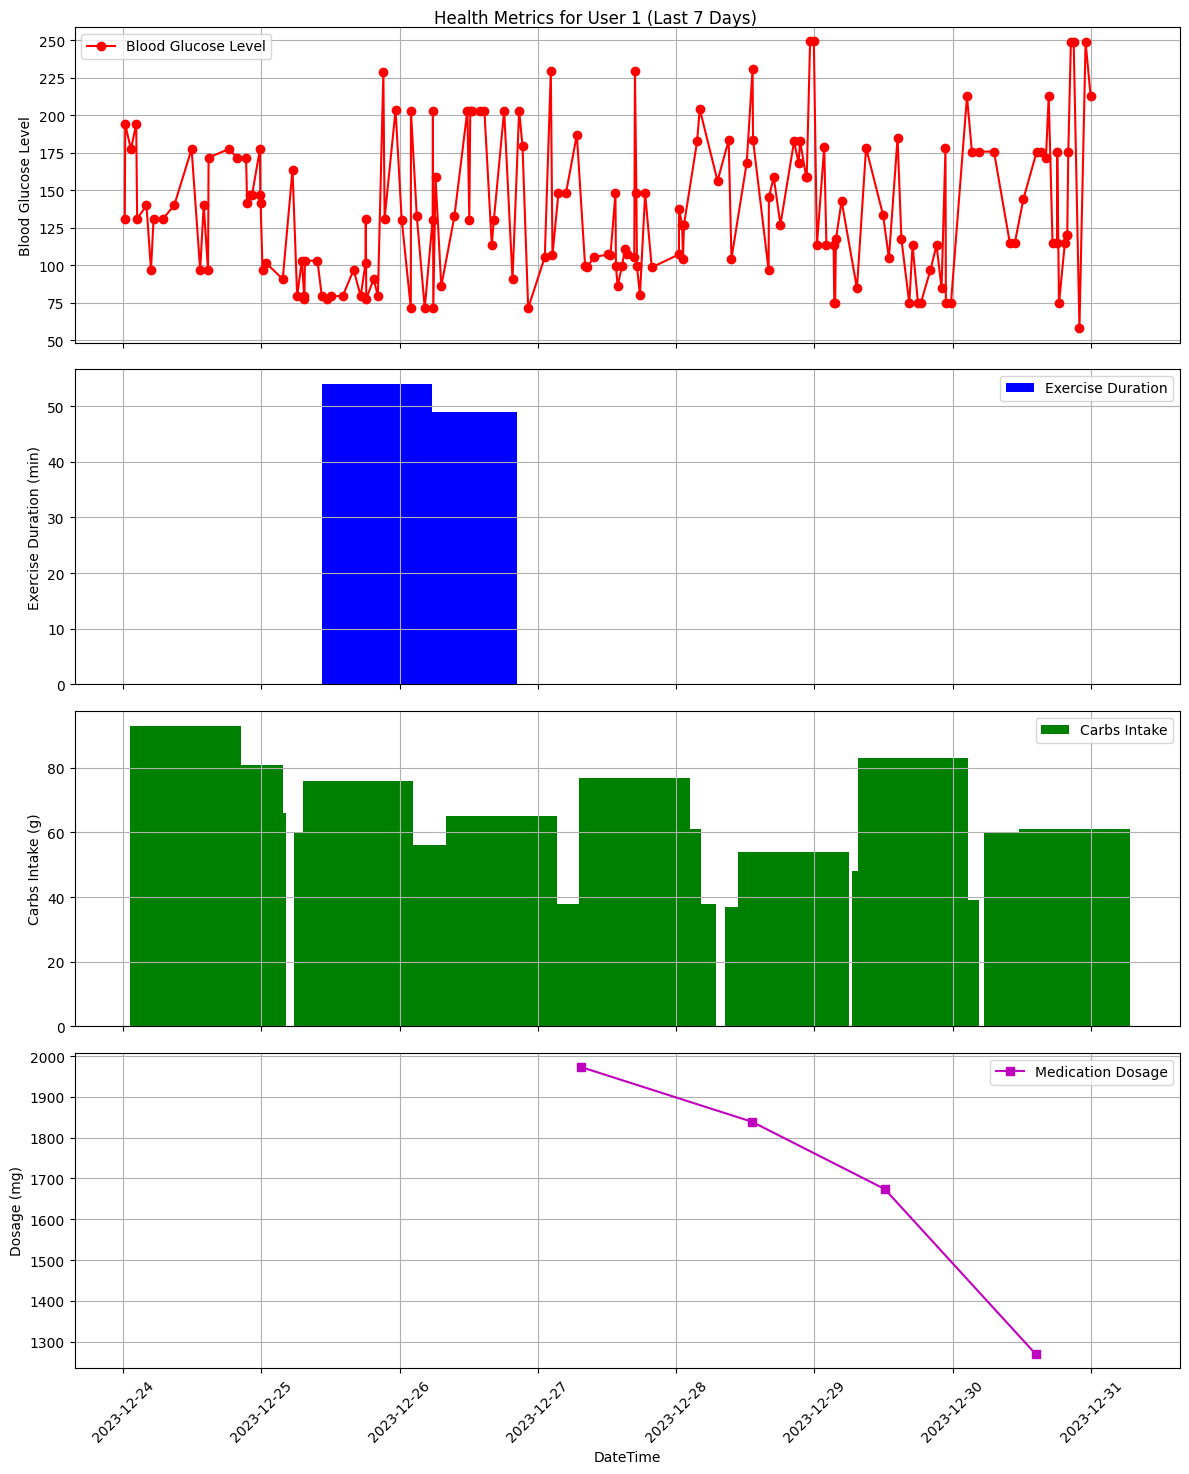

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the user and date range
user_id = 1
end_date = df1['DateTime'].max()  # Get the latest date in df1
start_date = end_date - pd.Timedelta(days=7)  # Get the date 7 days earlier

# Filter each DataFrame for the user and the date range
df1_filtered = df1[(df1['User_ID'] == user_id) & (df1['DateTime'] >= start_date)]
df2_filtered = df2[(df2['User_ID'] == user_id) & (df2['DateTime'] >= start_date)]
df3_filtered = df3[(df3['User_ID'] == user_id) & (df3['DateTime'] >= start_date)]
df4_filtered = df4[(df4['User_ID'] == user_id) & (df4['DateTime'] >= start_date)]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

# Plot Blood Glucose Level
axes[0].plot(df1_filtered['DateTime'], df1_filtered['Blood_Glucose_Level'], marker='o', linestyle='-', color='r', label='Blood Glucose Level')
axes[0].set_ylabel('Blood Glucose Level')
axes[0].legend()
axes[0].grid()

# Plot Exercise Duration
axes[1].bar(df2_filtered['DateTime'], df2_filtered['Exercise_Duration'], color='b', label='Exercise Duration')
axes[1].set_ylabel('Exercise Duration (min)')
axes[1].legend()
axes[1].grid()

# Plot Carbs Intake
axes[2].bar(df3_filtered['DateTime'], df3_filtered['Carbs_Intake'], color='g', label='Carbs Intake')
axes[2].set_ylabel('Carbs Intake (g)')
axes[2].legend()
axes[2].grid()

# Plot Medication Dosage
axes[3].plot(df4_filtered['DateTime'], df4_filtered['Dosage_mg'], marker='s', linestyle='-', color='m', label='Medication Dosage')
axes[3].set_ylabel('Dosage (mg)')
axes[3].legend()
axes[3].grid()

# Set common labels
plt.xlabel('DateTime')
plt.suptitle(f'Health Metrics for User {user_id} (Last 7 Days)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plots
plt.show()


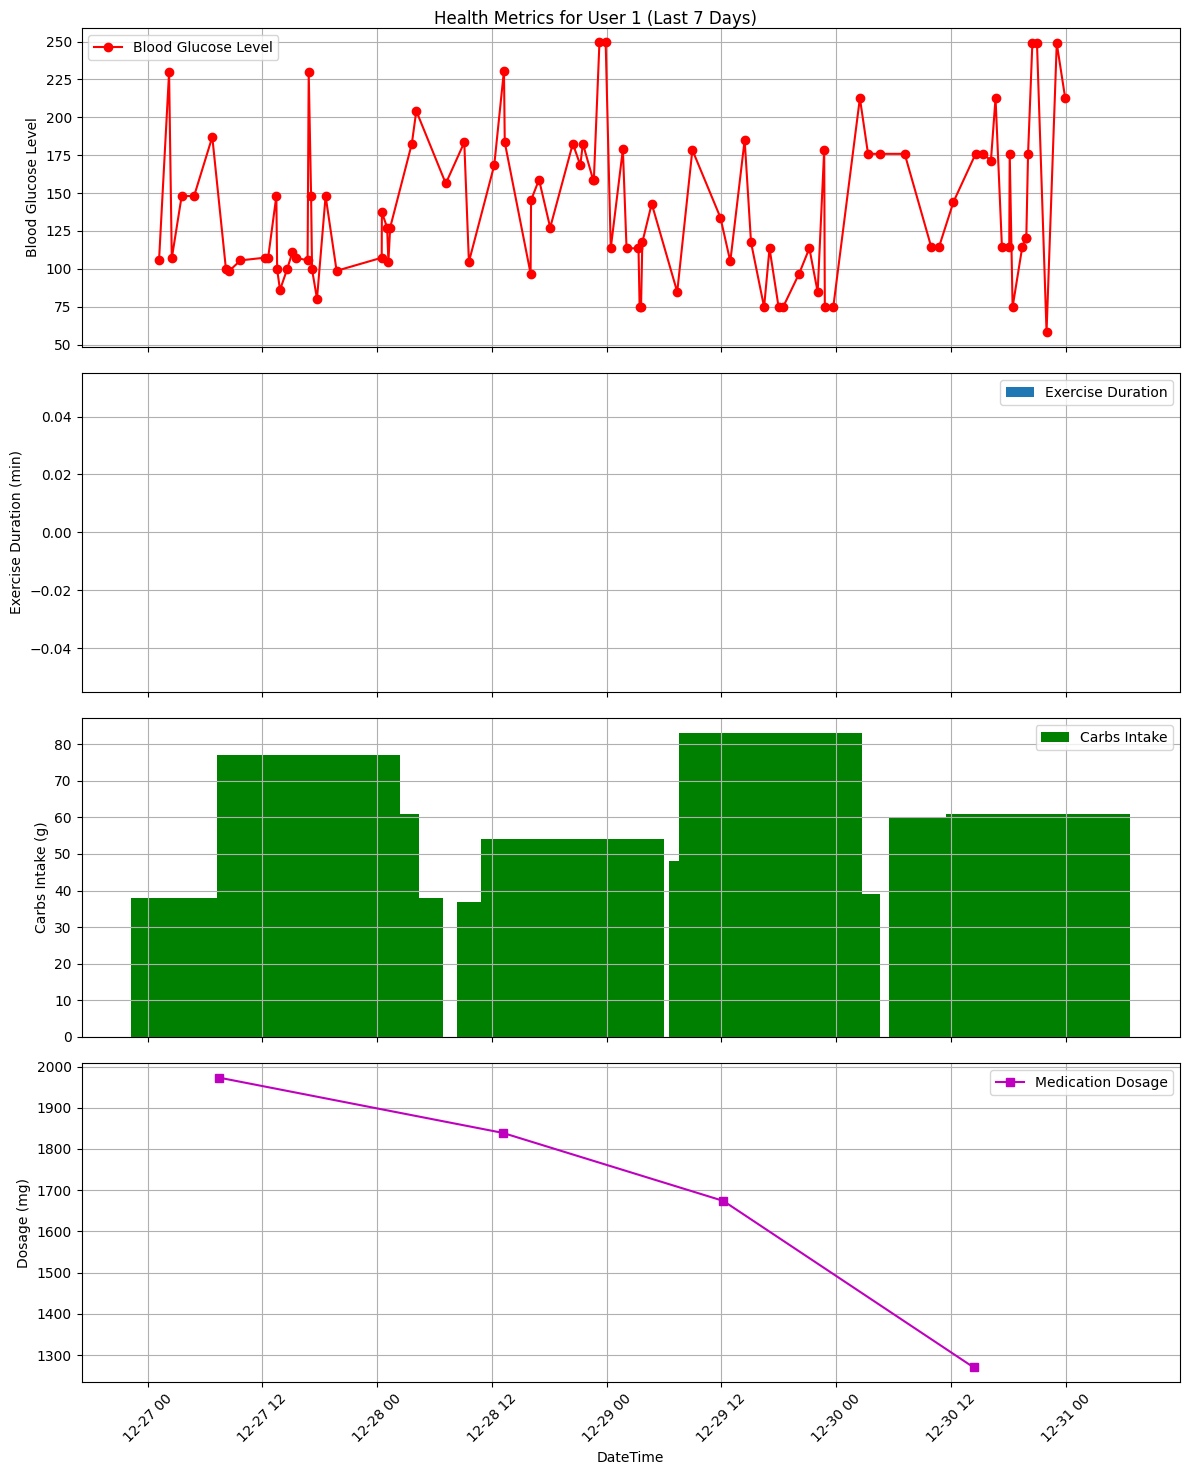

In [8]:
# Define the user and date range
user_id = 1
end_date = df1['DateTime'].max()  # Get the latest date in df1
start_date = end_date - pd.Timedelta(days=4)  # Get the date 7 days earlier


# Filter each DataFrame for the user and the date range
df1_filtered = df1[(df1['User_ID'] == user_id) & (df1['DateTime'] >= start_date)]
df2_filtered = df2[(df2['User_ID'] == user_id) & (df2['DateTime'] >= start_date)]
df3_filtered = df3[(df3['User_ID'] == user_id) & (df3['DateTime'] >= start_date)]
df4_filtered = df4[(df4['User_ID'] == user_id) & (df4['DateTime'] >= start_date)]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

# Plot Blood Glucose Level
axes[0].plot(df1_filtered['DateTime'], df1_filtered['Blood_Glucose_Level'], marker='o', linestyle='-', color='r', label='Blood Glucose Level')
axes[0].set_ylabel('Blood Glucose Level')
axes[0].legend()
axes[0].grid()

# Plot Exercise Duration
axes[1].bar(df2_filtered['DateTime'], df2_filtered['Exercise_Duration'], color='b', label='Exercise Duration')
axes[1].set_ylabel('Exercise Duration (min)')
axes[1].legend()
axes[1].grid()

# Plot Carbs Intake
axes[2].bar(df3_filtered['DateTime'], df3_filtered['Carbs_Intake'], color='g', label='Carbs Intake')
axes[2].set_ylabel('Carbs Intake (g)')
axes[2].legend()
axes[2].grid()

# Plot Medication Dosage
axes[3].plot(df4_filtered['DateTime'], df4_filtered['Dosage_mg'], marker='s', linestyle='-', color='m', label='Medication Dosage')
axes[3].set_ylabel('Dosage (mg)')
axes[3].legend()
axes[3].grid()

# Set common labels
plt.xlabel('DateTime')
plt.suptitle(f'Health Metrics for User {user_id} (Last 7 Days)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plots
plt.show()


In [9]:
# Define thresholds
lower_threshold = 70
upper_threshold = 180
severe_hypo_threshold = 54

# Total number of records
total_records = len(df1_filtered)

# Count occurrences for each condition
time_in_range = len(df1_filtered[(df1_filtered['Blood_Glucose_Level'] >= lower_threshold) & (df1_filtered['Blood_Glucose_Level'] <= upper_threshold)]) / total_records * 100
time_below_range = len(df1_filtered[df1_filtered['Blood_Glucose_Level'] < lower_threshold]) / total_records * 100
time_above_range = len(df1_filtered[df1_filtered['Blood_Glucose_Level'] > upper_threshold]) / total_records * 100
severe_hypo_time = len(df1_filtered[df1_filtered['Blood_Glucose_Level'] < severe_hypo_threshold]) / total_records * 100

# Print results
print(f"✅ Time in Range (70–180 mg/dL): {time_in_range:.2f}%")
print(f"✅ Time Below Range (<70 mg/dL): {time_below_range:.2f}%")
print(f"✅ Time Above Range (>180 mg/dL): {time_above_range:.2f}%")
print(f"✅ Severe Hypoglycemia (<54 mg/dL): {severe_hypo_time:.2f}%")

# Find times when blood glucose exceeded threshold
high_glucose_times = df1_filtered[df1_filtered['Blood_Glucose_Level'] > upper_threshold]['DateTime']
print("\n⏰ Times when Blood Glucose Level exceeded 180 mg/dL:")
print(high_glucose_times.tolist())


✅ Time in Range (70–180 mg/dL): 79.17%
✅ Time Below Range (<70 mg/dL): 1.04%
✅ Time Above Range (>180 mg/dL): 19.79%
✅ Severe Hypoglycemia (<54 mg/dL): 0.00%

⏰ Times when Blood Glucose Level exceeded 180 mg/dL:
[Timestamp('2023-12-27 02:15:00'), Timestamp('2023-12-27 06:46:00'), Timestamp('2023-12-27 16:51:00'), Timestamp('2023-12-28 03:38:00'), Timestamp('2023-12-28 04:06:00'), Timestamp('2023-12-28 09:07:00'), Timestamp('2023-12-28 13:16:00'), Timestamp('2023-12-28 13:21:00'), Timestamp('2023-12-28 20:28:00'), Timestamp('2023-12-28 21:31:00'), Timestamp('2023-12-28 23:15:00'), Timestamp('2023-12-28 23:54:00'), Timestamp('2023-12-29 14:26:00'), Timestamp('2023-12-30 02:29:00'), Timestamp('2023-12-30 16:40:00'), Timestamp('2023-12-30 20:31:00'), Timestamp('2023-12-30 21:00:00'), Timestamp('2023-12-30 23:04:00'), Timestamp('2023-12-30 23:57:00')]


In [10]:
# User-defined input for time frame (number of days)
num_days = 7  # Dynamic input

In [11]:
# Define the user and date range
user_id = 1
end_date = df1['DateTime'].max()
start_date = end_date - pd.Timedelta(days=num_days)  # Use user input for time frame


In [12]:
# Filter data for the selected user and date range
df1_filtered = df1[(df1['User_ID'] == user_id) & (df1['DateTime'] >= start_date)]
df2_filtered = df2[(df2['User_ID'] == user_id) & (df2['DateTime'] >= start_date)]
df3_filtered = df3[(df3['User_ID'] == user_id) & (df3['DateTime'] >= start_date)]
df4_filtered = df4[(df4['User_ID'] == user_id) & (df4['DateTime'] >= start_date)]

In [13]:
# Identify points where Blood Glucose Level exceeds threshold (180 mg/dL)
high_glucose = df1_filtered[df1_filtered['Blood_Glucose_Level'] > 180]

# Store the flagged values and timestamps
high_glucose_data = high_glucose[['DateTime', 'Blood_Glucose_Level']]


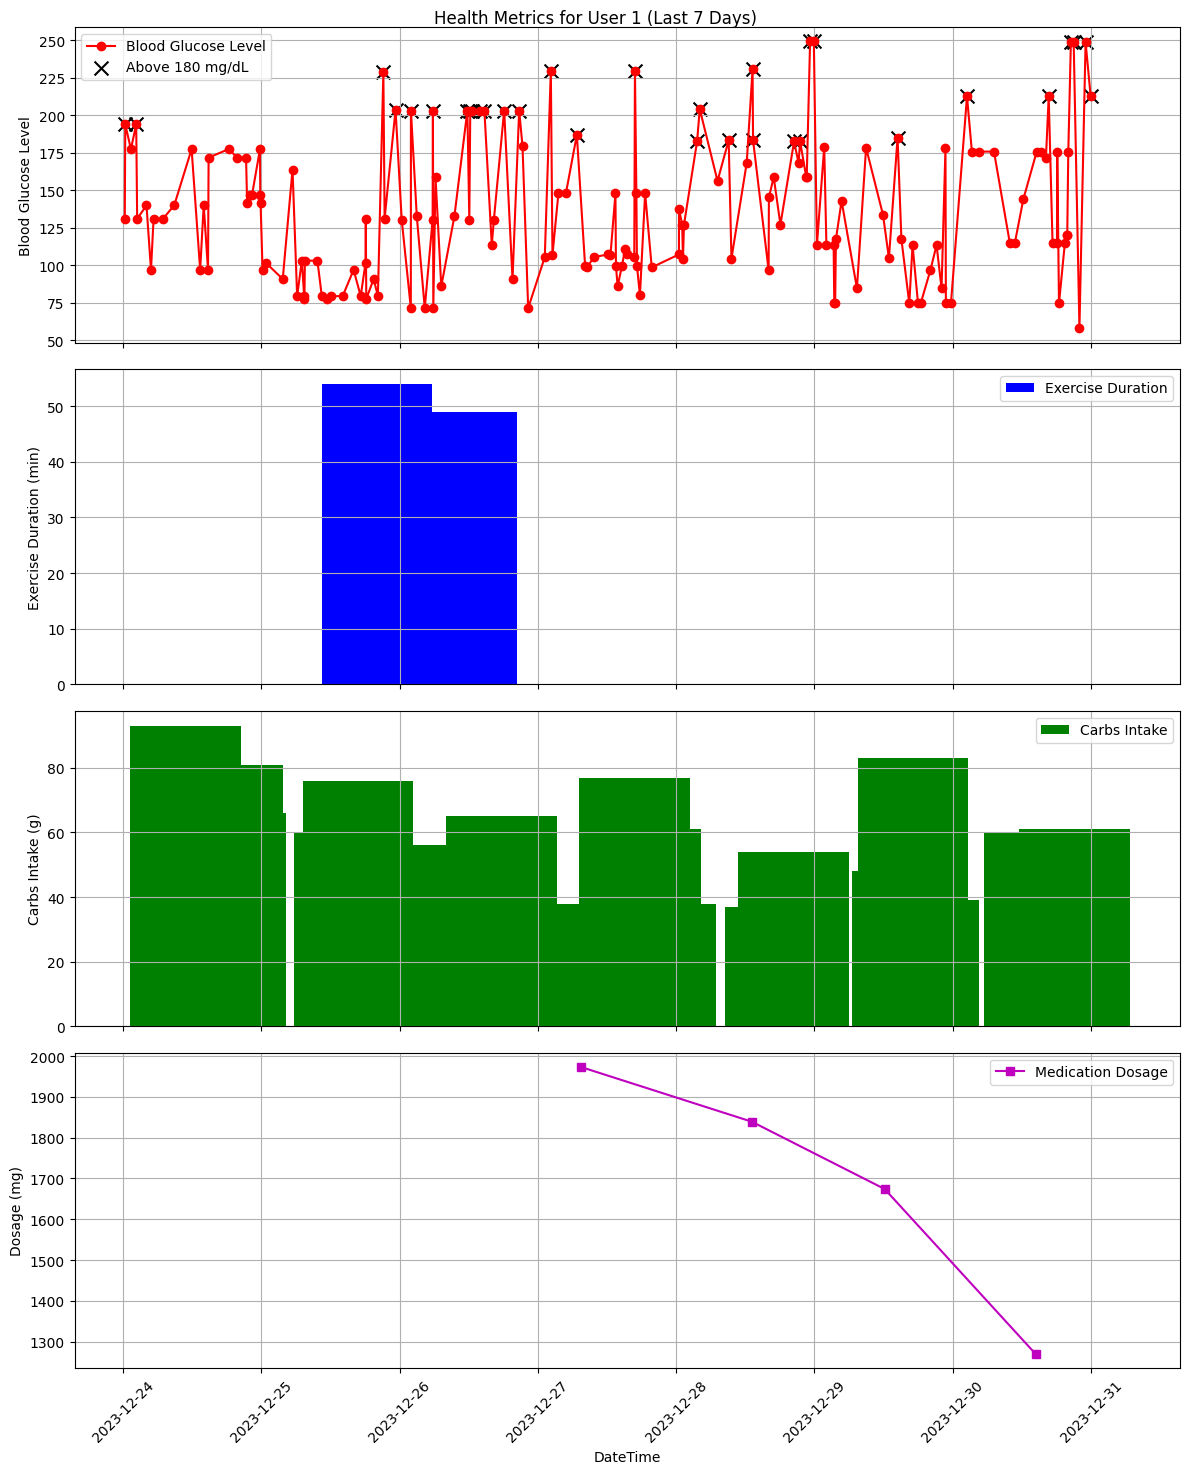

In [14]:
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

# Plot Blood Glucose Level with flagged points
axes[0].plot(df1_filtered['DateTime'], df1_filtered['Blood_Glucose_Level'], marker='o', linestyle='-', color='r', label='Blood Glucose Level')
axes[0].scatter(high_glucose['DateTime'], high_glucose['Blood_Glucose_Level'], color='black', marker='x', s=100, label='Above 180 mg/dL')  # Flagged points
axes[0].set_ylabel('Blood Glucose Level')
axes[0].legend()
axes[0].grid()

# Plot Exercise Duration
axes[1].bar(df2_filtered['DateTime'], df2_filtered['Exercise_Duration'], color='b', label='Exercise Duration')
axes[1].set_ylabel('Exercise Duration (min)')
axes[1].legend()
axes[1].grid()

# Plot Carbs Intake
axes[2].bar(df3_filtered['DateTime'], df3_filtered['Carbs_Intake'], color='g', label='Carbs Intake')
axes[2].set_ylabel('Carbs Intake (g)')
axes[2].legend()
axes[2].grid()

# Plot Medication Dosage
axes[3].plot(df4_filtered['DateTime'], df4_filtered['Dosage_mg'], marker='s', linestyle='-', color='m', label='Medication Dosage')
axes[3].set_ylabel('Dosage (mg)')
axes[3].legend()
axes[3].grid()

# Set common labels
plt.xlabel('DateTime')
plt.suptitle(f'Health Metrics for User {user_id} (Last {num_days} Days)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Print the flagged timestamps
if not high_glucose_data.empty:
    print("\n⏰ Times when Blood Glucose Level exceeded 180 mg/dL:")
    print(high_glucose_data.to_string(index=False))
else:
    print("\n✅ No Blood Glucose Level exceeded 180 mg/dL in the selected timeframe.")


⏰ Times when Blood Glucose Level exceeded 180 mg/dL:
           DateTime  Blood_Glucose_Level
2023-12-24 00:23:00           194.016608
2023-12-24 02:17:00           194.016608
2023-12-25 21:11:00           228.728513
2023-12-25 23:18:00           203.726264
2023-12-26 01:58:00           203.289956
2023-12-26 05:47:00           203.289956
2023-12-26 11:46:00           203.289956
2023-12-26 12:16:00           203.289956
2023-12-26 12:37:00           203.289956
2023-12-26 14:01:00           203.289956
2023-12-26 14:43:00           203.289956
2023-12-26 18:09:00           203.289956
2023-12-26 20:45:00           203.289956
2023-12-27 02:15:00           229.696367
2023-12-27 06:46:00           187.091161
2023-12-27 16:51:00           229.696367
2023-12-28 03:38:00           182.657262
2023-12-28 04:06:00           204.229819
2023-12-28 09:07:00           183.521226
2023-12-28 13:16:00           230.936085
2023-12-28 13:21:00           183.521226
2023-12-28 20:28:00           182.657262
202

In [16]:
# Merge all relevant data for flagged timestamps
merged_data = pd.merge(high_glucose, df3_filtered, on=['User_ID', 'DateTime'], how='left', suffixes=('', '_Carbs'))
merged_data = pd.merge(merged_data, df2_filtered, on=['User_ID', 'DateTime'], how='left', suffixes=('', '_Exercise'))
merged_data = pd.merge(merged_data, df4_filtered, on=['User_ID', 'DateTime'], how='left', suffixes=('', '_Dosage'))

In [18]:
# Print the head of each DataFrame
print("\n🔹 Head of high_glucose DataFrame:")
print(high_glucose.head())

print("\n🔹 Head of df3_filtered (Carbs Intake) DataFrame:")
print(df3_filtered.head())

print("\n🔹 Head of df2_filtered (Exercise Duration) DataFrame:")
print(df2_filtered.head())

print("\n🔹 Head of df4_filtered (Medication Dosage) DataFrame:")
print(df4_filtered.head())

print("\n🔹 Head of merged_data DataFrame (Final Merged Result):")
print(merged_data.head())


🔹 Head of high_glucose DataFrame:
      User_ID  Blood_Glucose_Level            DateTime
4153        1           194.016608 2023-12-24 00:23:00
4155        1           194.016608 2023-12-24 02:17:00
4197        1           228.728513 2023-12-25 21:11:00
4199        1           203.726264 2023-12-25 23:18:00
4202        1           203.289956 2023-12-26 01:58:00

🔹 Head of df3_filtered (Carbs Intake) DataFrame:
     User_ID Meal_Type  Carbs_Intake            DateTime
503        1     Snack            93 2023-12-24 10:48:00
504        1    Dinner            66 2023-12-24 18:38:00
505        1    Dinner            64 2023-12-24 16:18:00
506        1    Dinner            81 2023-12-24 18:07:00
507        1    Dinner            76 2023-12-25 16:45:00

🔹 Head of df2_filtered (Exercise Duration) DataFrame:
     User_ID Exercise_Type  Exercise_Duration            DateTime
121        1          HIIT                 54 2023-12-25 20:03:00
122        1          HIIT                 49 2023-12-26